In [1]:
import numpy as np
import pandas as pd

# Data 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols

# 선형모델 formula(y~x1+x2+...)
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm

# 통계분석 패키지
from scipy import stats
import scipy.stats

from scipy.stats import shapiro
# 주피터노트북에 그래프 바로 그리기 위한 설정
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False # 음수값이 깨지는 경우, 방지

# [평균검정]
## ② 2-sample t-test

In [2]:
df = pd.read_csv("./datasets/2sample.csv")
df.head()

,cust A,cust B
0,6,7
1,5,5
2,5,7
3,4,8
4,6,7


##### box plot


<Axes: >

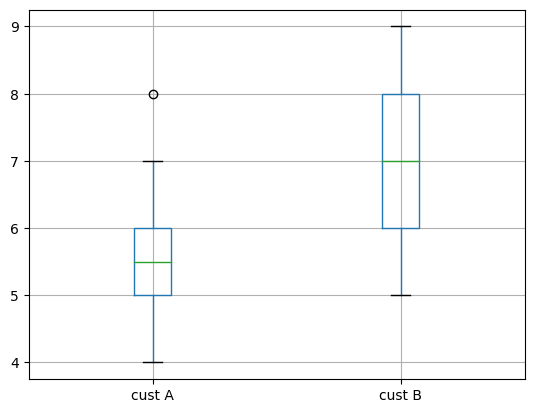

In [3]:
df.boxplot(['cust A', 'cust B'])

#### 해석
검정 전, 상자그림을 그려보면, A의 Q1 = 5, Q3 = 6으로 Data의 50%가 median가 B와 차이가 있어보인다. <br>
Q3 + 1.5xIQR을 벗어난 데이터 = 이상치 <br>
Q1 - 1.5xIQR을 벗어난 데이터 = 이상치

<Axes: >

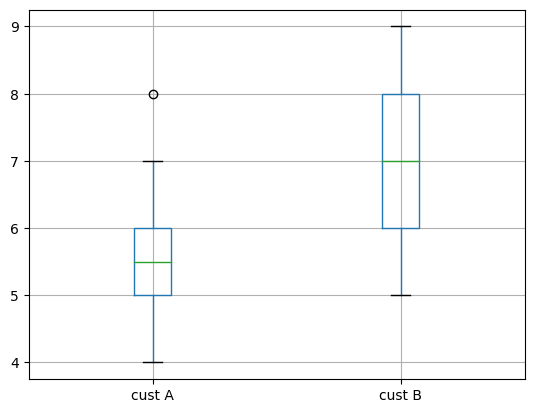

In [4]:
df[['cust A', 'cust B']].boxplot()

##### 정규성 검정
H0: 정규성을 따른다. <br>
H1: 정규성을 따르지 않는다.

In [5]:
from scipy.stats import shapiro

shapiro(df['cust A'])

ShapiroResult(statistic=0.9094840288162231, pvalue=0.06230909377336502)

In [6]:
shapiro(df['cust B'])

ShapiroResult(statistic=0.9119448661804199, pvalue=0.0694197416305542)

#### 해석
두 데이터 모두 정규성을 따른다.

##### 등분산성 검정
H0: 두 집단의 분산이 같다. <br>
H1: 두 집단의 분산이 같지않다.

In [7]:
# 바틀렛 사용 이유: 데이터가 정규성을 갖고 있으면 바틀렛 사용
stats.bartlett(df['cust A'], df['cust B'])

BartlettResult(statistic=0.3717065402376611, pvalue=0.5420755238642572)

#### 해석
등분산성 검정 결과 두 집단의 분산 동일.

##### 독립적인 2-sample T-test

In [8]:
t_result = stats.ttest_ind(df['cust A'], df['cust B'], equal_var=True) # 2-sample t-tst

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
t, p

(-3.596, 0.001)

#### 해석
검정통계랑이 약 -4, 유의수준 5%에서 A고객층과 B고객층의 만족도는 차이가 있다고 할 수 있다.

### i. 실습

In [9]:
df = pd.DataFrame({"A":[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344],
                  "B":[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]})

<Axes: >

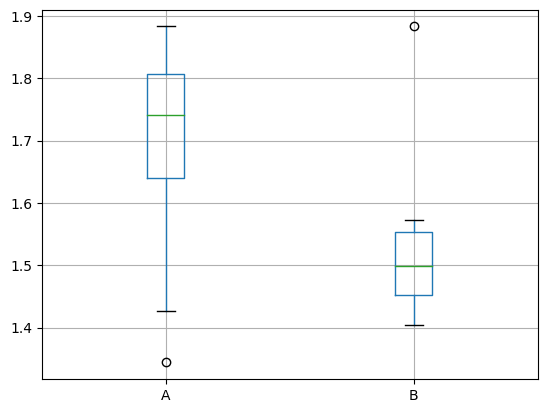

In [10]:
df.boxplot()

#### 해석
검정 전, 데이터의 특징을 살펴보기 위해 상자그림을 그려보면, A의 Q1(데이터의 25% 지점)은 약 1.65, Q3(데이터의 75% 지점)은 약 1.8이다. <br>
B는 Q1이 1.5, Q3이 약 1.55임을 알 수 있으며 Data의 median이 B와 차이가 있어보인다. <br>
또한, 각 데이터는 이상치로 보이는 값을 갖고 있다.<br>
Q3 + 1.5xIQR을 벗어난 데이터 = 이상치 <br>
Q1 - 1.5xIQR을 벗어난 데이터 = 이상치

##### 정규성 검정
- $H_0$: 모집단이 정규성을 따른다.
- $H_1$: 모집단이 정규성을 따르지 않는다.

In [11]:
shapiro(df['A'])

ShapiroResult(statistic=0.8425754904747009, pvalue=0.08004532009363174)

In [12]:
shapiro(df['B'])

ShapiroResult(statistic=0.7734811902046204, pvalue=0.014793740585446358)

#### 해석
위 가설하에서, A와 B 각각에 대한 정규성 검사 결과,
A의 통계량 = 0.843, p-value = 0.08로 유의수준 5%하에서 귀무가설을 기각하지 못한다. <br>
따라서 **A에 대해서는 정규성을 따른다**고 볼 수 있으며 B에 대해서는 통계량 = 0.77, p-value = 0.01로<br>
유의수준 5%하에서 귀무가설을 기각하여 **데이터 B는 정규성을 따르지 않는다**고 볼 수 있다. <br>
따라서, 데이터 B는 층별 추출이나 Data를 늘리는 등의 정규성을 따르도록 값을 수정/처리할 필요가 있다.<br>
하지만, 해당 실습에서는 그 과정을 수행하지 않고 **Levene를 사용해 등분산성을 검정**한다.

##### 등분산성 검정
- $H_0$: 두 집단의 분산이 동일하다.
- $H_1$: 두 집단의 분산이 다르다.

In [13]:
# levene 사용 이유: 데이터가 정규성을 갖고 있지않아 levene를 이용하여 등분산성 검정
stats.levene(df['A'], df['B'])

LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)

#### 해석
위 가설하에서, A와 B의 등분산성 검정 결과, F-통계량은 0.44이고 p-value = 0.517로 유의수준 5%하에서<br>
귀무가설을 기각하지 못한다. 따라서 **두 집단의 분산이 동일**하다고 볼 수 있다.

##### 독립적인 2-sample T-test
- $H_0$: A와 B 공급자 간에 모평균의 차이가 없다.
- $H_1$: A와 B 공급자 간에 모평균의 차이가 있다.

In [14]:
t_result = stats.ttest_ind(df['A'], df['B'], equal_var=True) # 2-sample t-tst

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
t, p

(1.7, 0.111)

#### 해석
등분산성 검정 결과, 두 분산이 동일한 결과가 나와서 equal_var=True를 설정하였고<br>
2표본 T-test 검정 결과, 검정통계랑이 약 1.7이고 p-value = 0.11로 유의수준 5%에서 귀무가설을 기각하지 못한다.<br>
따라서, A와 B공급 자 간의 모평균 차이가 없다고 할 수 있다.

## ③ Paired T-test

In [15]:
df = pd.read_csv("./datasets/paired.csv")
df.head()

,before,after
0,720,810
1,589,670
2,780,790
3,648,712
4,720,810


In [16]:
t_result = stats.ttest_rel(df['before'], df['after']) # Paired t-tst

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
t, p

(-5.324, 0.0)

#### 해석
H0: 두 자료의 전후 차이가 없다. <br>
H1: 두 자료의 전후 차이가 있다. <br>
paired T test는 이전/이후 자료로 등분산성 검정을 하지 않아도 된다. <br>
검정통계량이 -5.3으로 p-value는 약 0이다. 따라서 성적 차이가 있다.

p-value가 작을수록 통계적으로 유의미하다.

### ii. 실습

In [17]:
women_eng = pd.DataFrame({"before":[720,589,780,648,720,589,780,648,780,648],
                      "after":[710,580,787,712,750,600,782,670,790,680]})
women_eng.head()

,before,after
0,720,710
1,589,580
2,780,787
3,648,712
4,720,750


In [18]:
t_result = stats.ttest_rel(women_eng['before'], women_eng['after']) # Paired t-tst

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
t, p

(-2.266, 0.05)

#### 해석
$H_0$: 학원을 가기 전과 간 후의 영어성적에 차이가 없다. <br>
$H_1$: 학원을 가기 전과 간 후의 영어성적에 차이가 있다. <br>
paired T test는 이전/이후 자료로 등분산성 검정을 하지 않아도 된다. <br>
짝지어진 t-test 검정 결과, 검정통계량이 -2.266, p-value는 약 0.05이다. <br>
따라서, 유의수준 5%에서 H0를 기각하지 못하고 학원을 가기 전과 간 후의 성적 차이가 없다고 볼 수 있다. <br>
하지만, 유의수준 10%에서 검정하면 차이가 있다고 볼 수도 있을 것이다.

## ④ 1 Proportion Test

In [19]:
# H0: p = 0.1, H1: p /= 0.1

count = 15
n_obs = 100

p0 = 0.1

stat, p = proportions_ztest(count, n_obs, p0)
print("1 Proportion Test")
print("z:{}\t p-value:{}".format(stat.round(3), p.round(3)))

1 Proportion Test
z:1.4	 p-value:0.161


### iii. 실습

In [20]:
count = 40
n_obs = 100

p0 = 0.5
stat, p = proportions_ztest(count, n_obs, p0)
print("1 Proportion Test")
print("z:{}\t p-value:{}".format(stat.round(3), p.round(3)))

1 Proportion Test
z:-2.041	 p-value:0.041


#### 해석
$H_0$: 앞면이 나올 확률은 0.5이다.(모집단의 비율 = 0.5) <br>
$H_1$: 앞면이 나올 확률은 0.5이 아니다. (모집단의 비율 /= 0.5)<br>
1 proportion 검정 결과, z 통계량은 -2.041이고 p-value = 0.041이다.<br>
유의수준 5% 하에서 귀무가설을 기각하고 앞면이 나올 확률은 0.5가 아니라고 볼 수 있다.

## ⑤ 2 Proportion Test
$H_0$: 두 공장의 불량률이 같다. ($p_1$ = $p_2$) <br>
$H_1$: 두 공장의 불량률이 다르다. ($p_1$ /= $p_2$)

In [21]:
count = np.array([4, 1])
n_obs = np.array([1000, 1200])

stat, p = proportions_ztest(count, n_obs)
print("2 Proportion Test")
print("z:{}\t p-value:{}".format(stat.round(3), p.round(3)))

2 Proportion Test
z:1.553	 p-value:0.12


#### 해석
유의수준 5%에서 2 proportion Test를 시행할 때, p-value가 더 크기때문에 H0를 채택한다. <br>
즉, 두 공장의 불량률의 차이가 없다고 볼 수 있다.

### iv. 실습
$H_0$: 동일한 제품을 생산하는 두 공정의 불량률은 같다. ($p_A$ = $p_B$) <br>
$H_1$: 동일한 제품을 생산하는 두 공정의 불량률은 다르다. ($p_A$ /= $p_B$)

In [22]:
count = np.array([14, 5])
n_obs = np.array([1200, 1200])

stat, p = proportions_ztest(count, n_obs)
print("2 Proportion Test")
print("z:{}\t p-value:{}".format(stat.round(3), p.round(3)))

2 Proportion Test
z:2.073	 p-value:0.038


#### 해석
위 가설하에서 2 proportion Test를 시행할 때, z통계량은 2.073이고 유의수준 5% 하에서 p-value=0.038로 귀무가설을 기각한다. <br>
즉, 두 공장의 불량률의 차이가 있다고 볼 수 있다.

# 2. 카이제곱 검정
- 
1. 동일성 검정
2. 독립성 검정
3. 적합도 검정

## ① 동일성 검정
- $H_0$: 근무조별로 제품을 생산하는 부하의 차이가 없다.
- $H_1$: 근무조별로 제품을 생산하는 부하의 차이가 있다.

In [23]:
df = pd.read_csv("./datasets/카이제곱_근무조.csv")
df

,work_1,work_2,work_3,work_4
0,270,260,236,234
1,228,285,225,262
2,277,284,231,208


In [24]:
chi, p, dof, expected = stats.chi2_contingency(df)

print("카이제곱 검정 - 동일성 검정")
print("chisq: {}\t p-value: {}".format(chi.round(3), p.round(3)))
print("df: {}".format(dof))
print("기대치: \n{}".format(expected.round(1)))

카이제곱 검정 - 동일성 검정
chisq: 13.366	 p-value: 0.038
df: 6
기대치: 
[[258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]]


#### 해석
유의수준 5%에서 근무조별로 제품을 생산하는 부하의 차이가 있다고 할 수 있다.

### v. 실습
- $H_0$: 각 제품의 이미지에 대한 차이가 없다.
- $H_1$: 각 제품의 이미지에 대한 차이가 있다.

In [25]:
df = pd.read_csv("./datasets/카이제곱_노트북.csv")
df

,A,B,C,D,E,F
0,18,8,4,4,3,3
1,2,2,1,1,1,25
2,14,14,3,2,3,8
3,5,5,4,3,1,10
4,5,5,9,2,1,2
5,9,9,5,7,1,1
6,4,4,4,3,1,7


In [26]:
chi, p, dof, expected = stats.chi2_contingency(df)

print("카이제곱 검정 - 동일성 검정")
print("chisq: {}\t p-value: {}".format(chi.round(3), p.round(3)))
print("df: {}".format(dof))
print("기대치: \n{}".format(expected.round(1)))

카이제곱 검정 - 동일성 검정
chisq: 95.759	 p-value: 0.0
df: 30
기대치: 
[[10.2  8.4  5.4  3.9  2.  10. ]
 [ 8.2  6.7  4.3  3.2  1.6  8. ]
 [11.2  9.3  5.9  4.3  2.2 11. ]
 [ 7.2  5.9  3.8  2.8  1.4  7. ]
 [ 6.1  5.1  3.2  2.4  1.2  6. ]
 [ 8.2  6.7  4.3  3.2  1.6  8. ]
 [ 5.9  4.8  3.1  2.3  1.1  5.8]]


#### 해석
위 가설하에서, 동일성 검정 결과, $\chi^2$ 검정통계량 = 95.759이며 p-value는 약 0이 나왔다.<br>
따라서, 유의수준 5%에서 귀무가설을 기각하며 각 제품에 대한 이미지 차이가 있다고 할 수 있다.

## ② ANOVA(정규성, 등분산성 검정 해야함)
- $H_0$: 그룹별 영어성적의 차이가 없다.
- $H_1$: 적어도 하나는 다르다.

In [27]:
df = pd.read_csv("./datasets/ANOVA1.csv")
df

,A_G,B_G,C_G
0,892,721,621
1,623,821,915
2,721,910,888
3,678,678,721
4,723,723,894
5,790,790,834
6,720,711,841
7,670,790,912
8,690,745,845
9,771,891,889


##### boxplot

<Axes: >

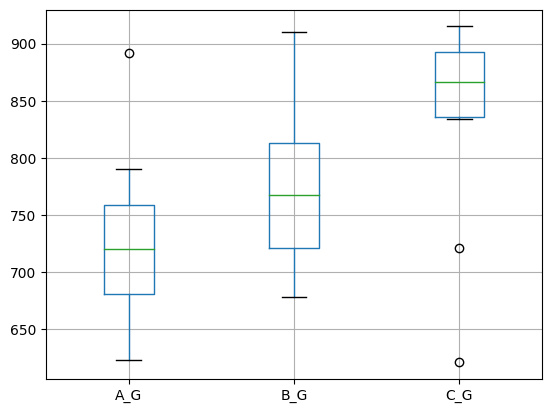

In [28]:
df.boxplot()

#### 해석
- IQR이 작다 = 산포가 작다.
- C > B > A 순으로 영어성적 좋음.
- C그룹과 두 그룹의 차이가 큰 것을 보고 p-value가 작을 것이라 예측 가능.

##### ANOVA 분석

In [29]:
f_result = stats.f_oneway(df['A_G'], df['B_G'], df['C_G'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

f, p

(4.263, 0.025)

#### 해석
F-통계량 = 4.263으로 p-value = 0.025이다. 유의수준 5% 하에서 H0를 기각한다. 따라서 적어도 한 그룹과 차이가 있다고 할 수 있다.

### v. 실습

In [30]:
# 시간이 높아지면 청정도는 올라가지만, 
df = pd.read_csv("./datasets/ANOVA.csv")
df

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a
5,34.9,F,a,a
6,33.1,A,b,a
7,29.9,B,b,a
8,31.7,C,b,a
9,27.5,D,b,a


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      24 non-null     float64
 1   charge    24 non-null     object 
 2   gangjong  24 non-null     object 
 3   type      24 non-null     object 
dtypes: float64(1), object(3)
memory usage: 896.0+ bytes


##### boxplot

<Axes: title={'center': 'time'}, xlabel='gangjong'>

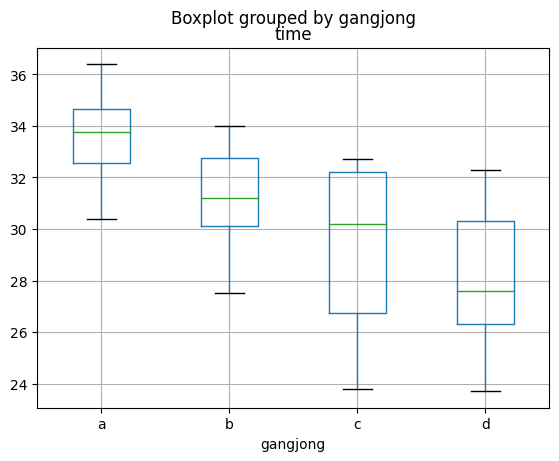

In [32]:
df.boxplot("time", by = 'gangjong') # y = time, x = gangjong

#### 해석
- x: 범주형, y: 연속형
- 강종 a의 IQR이 작은 것을 보아 산포가 작을 것임을 예상할 수 있으며 a, b, c, d 순으로 시간이 오래 걸린다.
- 또한, 상자그림을 봤을 때, 각 그룹의 상자그림 차이가 있어 p-value가 유의수준보다 작을 것이라 예측 가능하다.

<Axes: title={'center': 'time'}, xlabel='type'>

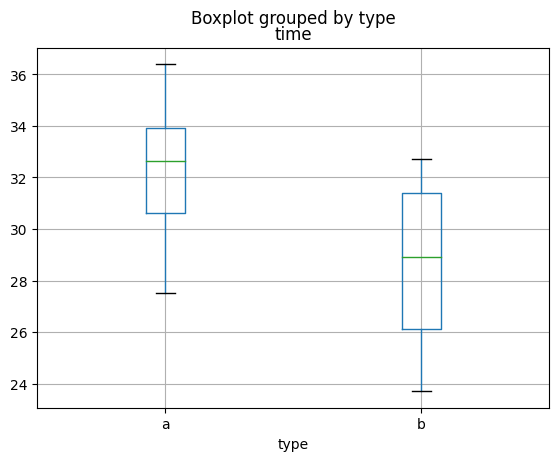

In [33]:
df.boxplot("time", by = 'type') # y = time, x = type

#### 해석
- x: 범주형, y: 연속형
- 강종 type의 a, b 순으로 시간이 오래 걸린다.
- 또한, 상자그림을 봤을 때, 각 그룹의 상자그림 차이가 있어 p-value가 유의수준보다 작을 것이라 예측 가능하다.

##### 정규성 검정
- $H_0$: 모집단이 정규성을 따른다.
- $H_1$: 모집단이 정규성을 따르지 않는다.

In [34]:
print(shapiro(df[df['gangjong'] == 'a']['time']))
print(shapiro(df[df['gangjong'] == 'b']['time']))
print(shapiro(df[df['gangjong'] == 'c']['time']))
print(shapiro(df[df['gangjong'] == 'd']['time']))

ShapiroResult(statistic=0.9879403114318848, pvalue=0.983557939529419)
ShapiroResult(statistic=0.9769707918167114, pvalue=0.9355478286743164)
ShapiroResult(statistic=0.8929420113563538, pvalue=0.3338908553123474)
ShapiroResult(statistic=0.9713904857635498, pvalue=0.901641845703125)


In [35]:
print(shapiro(df[df['type'] == 'a']['time']))
print(shapiro(df[df['type'] == 'b']['time']))

ShapiroResult(statistic=0.982139527797699, pvalue=0.9907686114311218)
ShapiroResult(statistic=0.9098271131515503, pvalue=0.2122616022825241)


#### 해석
위 가설하에서, 각각에 대한 정규성 검사 결과, 모든 데이터가 유의수준 5% 하에서 귀무가설을 기각하지 않는다.<br>
따라서 정규성을 따른다고 할 수 있다.

##### ANOVA
- H0: 강종별 2차 정련 시간에 차이가 없다. <br>
- H1: 적어도 하나 강종은 2차 정련 시간에 차이가 있다. <br> 
(원인-결과: 시간에는 강종의 영향이 있다.)

In [36]:
# 범주형 gangjong = Char = C(gangjong)
lm = ols('time ~ C(gangjong)', df).fit()  # ordinary least squares
print(anova_lm(lm))

               df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)   3.0  104.603333  34.867778  4.171868  0.019013
Residual     20.0  167.156667   8.357833       NaN       NaN


In [37]:
f_result = stats.f_oneway(df[df['gangjong'] == 'a']['time'], df[df['gangjong'] == 'b']['time'], 
                          df[df['gangjong'] == 'c']['time'], df[df['gangjong'] == 'd']['time'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

f, p

(4.172, 0.019)

#### 해석
위 가설하에서, 분산분석 결과, F통계량 = 4.17, p-value = 0.02이다.<br>
즉, 유의수준 5%에서 귀무가설을 기각하며 적어도 하나는 강종별 2차 정련 시간에 차이가 있다고 할 수 있다.<br>
다시 말해 정련 시간에 강종의 영향이 있다고 볼 수 있다.

##### ANOVA
- H0: type별 2차 정련 시간에 차이가 없다. <br>
- H1: 적어도 하나 type은 2차 정련 시간에 차이가 있다. <br> 
(원인-결과: 시간에는 type의 영향이 있다.)

In [38]:
lm2 = ols('time ~ C(type)', df).fit()  # ordinary list square
print(anova_lm(lm2))

            df      sum_sq    mean_sq         F   PR(>F)
C(type)    1.0   82.881667  82.881667  9.653816  0.00514
Residual  22.0  188.878333   8.585379       NaN      NaN


In [39]:
f_result = stats.f_oneway(df[df['type'] == 'a']['time'], df[df['type'] == 'b']['time'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)
f, p

(9.654, 0.005)

#### 해석
위 가설하에서, 분산분석 결과, F통계량 = 9.654, p-value = 0.005이다.<br>
즉, 유의수준 5%에서 귀무가설을 기각하며 적어도 하나는 type별 2차 정련 시간에 차이가 있다고 할 수 있다.<br>
다시 말해 정련 시간에 type의 영향이 있다고 볼 수 있다.

# [상관분석]

In [40]:
df = pd.read_csv("./datasets/작업시간.csv")
df

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


<Axes: xlabel='UNITS', ylabel='MINUTES'>

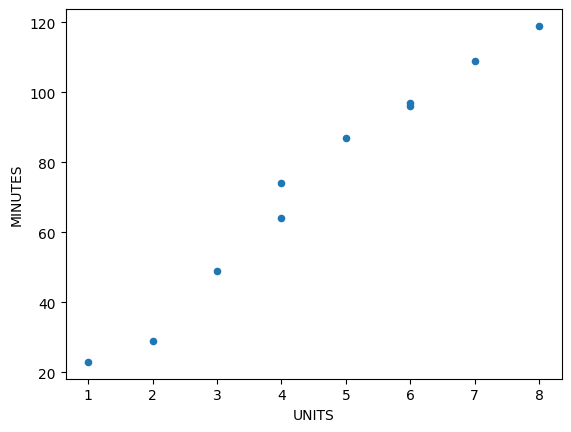

In [41]:
# 부품 수가 증가하니까 작업 시간이 늘어나는 선형관계 확인 가능
df.plot.scatter(x = 'UNITS', y = 'MINUTES')

In [42]:
corr, p = stats.pearsonr(df['UNITS'],df['MINUTES'])

corr, p

(0.9892262536728127, 5.8186086693473884e-08)

In [43]:
df.corr(method = 'pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.989
MINUTES,0.989,1.000


#### 해석
(모수에 대한 가설)
- $H_0$: p =0 (상관성이 없다.)
- $H_1$: p /=0 (상관성이 있다.)

p-value는 유의수준 5%하에서 귀무가설을 기각한다. 따라서, 상관계수 = 0.99로 양의 상관성이 매우 강하고 할 수 있다.<br>
부품수리시간과 부품수 간에 매우 강한 양의 상관성이 있다고 할 수 있다.

### vi. 실습

<Axes: xlabel='strength', ylabel='temp'>

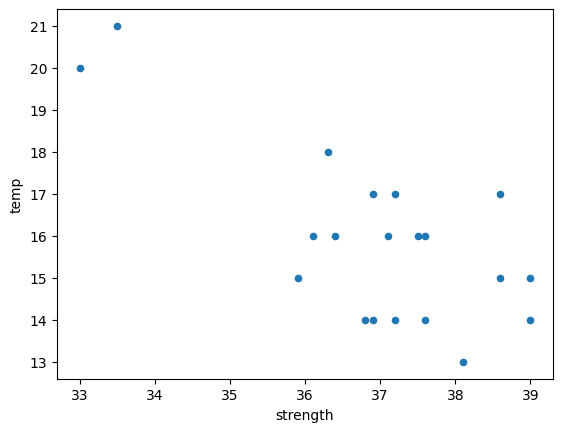

In [44]:
df = pd.DataFrame({"strength":[37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5],
                  "temp":[14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]})

# 초코칩의 강도가 올라갈수록 재료 반죽온도가 줄어드는 상관관계 확인 가능.
df.plot.scatter(x = 'strength', y = 'temp')

In [45]:
corr, p = stats.pearsonr(df['strength'],df['temp'])

corr, p

(-0.723107314935157, 0.00031520055100278216)

#### 해석
(모수에 대한 가설)
- $H_0$: p =0 (상관성이 없다.)
- $H_1$: p /=0 (상관성이 있다.)

상관분석 결과, p-value=0.0003으로 유의수준 5%하에서 귀무가설을 기각한다. 따라서, 상관계수 = -0.723로 음의 상관성이 매우 강하고 할 수 있다.<br>
초코칩의 강도와 재료 반죽온도 간에 매우 강한 음의 상관성이 있다고 할 수 있다.

# [회귀분석]

In [46]:
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant # 정규성 검정 plot, 상수항 추가

In [47]:
# 부품 수와 시간의 관계/시간 예측
df = pd.read_csv("./datasets/부품수리시간.csv")
df

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


In [48]:
# 기초통계량: data = 14, 평균 = 6, 중앙값 = 6으로 일치 -> 정규분포 할 것이라 예측 가능
df.describe()

,UNITS,MINUTES
count,14.000000,14.000000
mean,6.000000,97.214286
std,2.961289,46.217177
min,1.000000,23.000000
25%,4.000000,66.500000
50%,6.000000,96.500000
75%,8.750000,138.500000
max,10.000000,166.000000


<Axes: xlabel='UNITS', ylabel='MINUTES'>

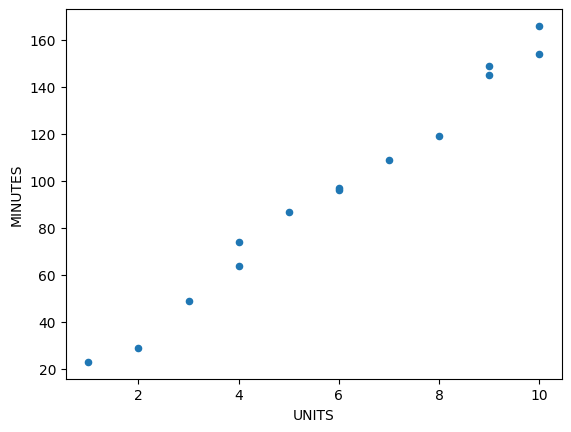

In [49]:
df.plot.scatter(x = 'UNITS', y = 'MINUTES')

In [50]:
# 상관관계: 상관계수 0.994로 두 변수 간 매우 높은 선형관계가 있음
df.corr(method = 'pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [51]:
# 회귀분석: y ~ x1 (+ x2 + ...) 이용 - 상수항 자동추가
reg_model = smf.ols(formula = 'MINUTES ~ UNITS', data = df)
reg_res = reg_model.fit()

reg_res.summary()

C:\Users\winju\Anaconda\envs\lab4\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           8.92e-13
Time:                        22:56:25   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.239      -3.148      11.472
UNITS         15.5088      0.505     30.712      0.000      14.409      16.609
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.624
Skew:                          -0.069   Prob(JB):                        0.732
Kurtosis:                       1.975   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 해석
- 관측값 = 14개, 잔차의 자유도 = 12, 모델의 자유도 = 1
- R-squared = 0.987
- F-통계량 = 943.2 -> p-value는 거의 0일 것
- 부품수 x의 coef = 15.509 -> p-value = 0 으로 변수가 통계적으로 유의미하다. (beta1 != 0)
- Prob(Omnibus): p-value = 0.689로 귀무가설 채택 - 정규성을 띈다.
- Durbin-Watson: 2.051 자기상관성이 없다 = 독립성 만족
- Prob (F-statistic):	8.92e-13 - 모델 적합 <br>
$\hat{Minutes}$  = 4.1617 + 15.5088*Units

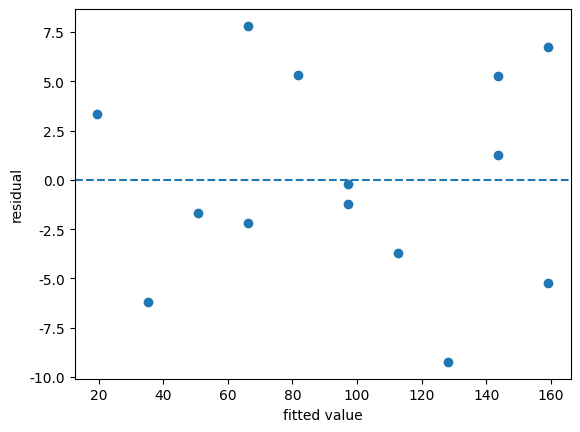

In [52]:
## 오차의 가정 검통
# 1. 등분산성: y = 0을 기준으로 랜덤하게 분포하여 등분산성 만족
plt.scatter(reg_res.fittedvalues, reg_res.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle='--')

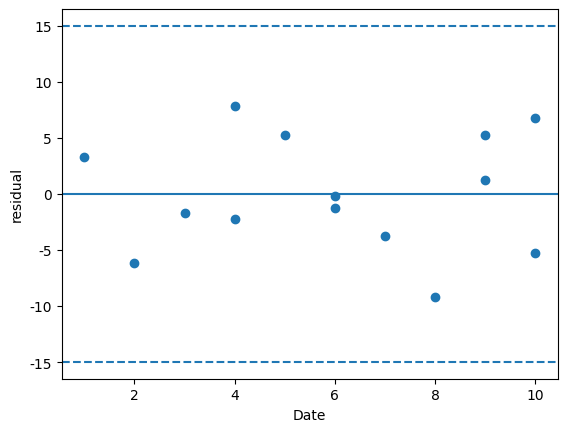

In [53]:
# 2. 독립성: y = 0을 기준으로 랜덤하게 산포되어 있어 독립성 만족
#plt.plot(df['UNITS'], reg_res.resid, marker = 'o')
plt.scatter(df['UNITS'], reg_res.resid, marker = 'o')
plt.xlabel("Date"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle='-')
plt.axhline(y = 3*np.std(reg_res.resid), linestyle='--')
plt.axhline(y = -3*np.std(reg_res.resid), linestyle='--')

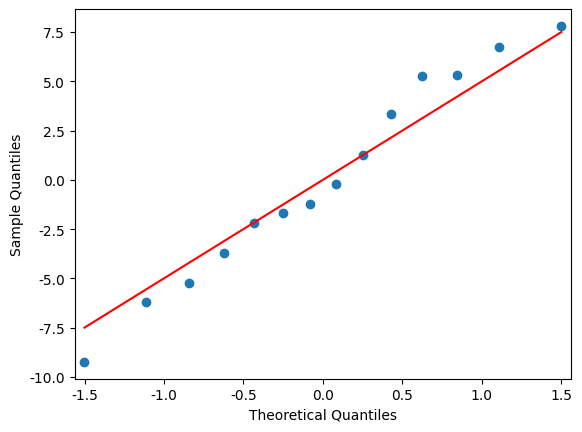

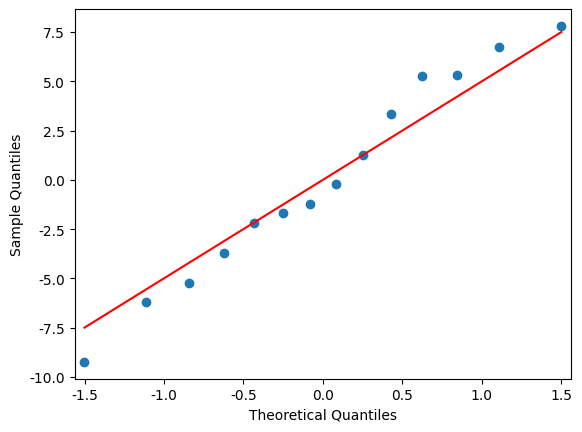

In [54]:
# 3. 잔차 정규성
qqplot(reg_res.resid, line='s') # q = quartile

In [55]:
from statsmodels.stats.stattools import omni_normtest

# 옴니버스 적용: 정규분포 직선을 중심으로 분포하고 검정통계량이 귀무가설을 채택하므로 정규분포를 따른다.
omni_normtest(reg_res.resid, axis=0)

C:\Users\winju\Anaconda\envs\lab4\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.7464482182734573, pvalue=0.6885109139659094)

최종 회귀식은 $\hat{Minutes}$ = 4.1617 + 15.5088*Units 이고 부품 수가 1단위 증가할 때마다 수리 시간은 15.51분 증가

### 실습

In [56]:
# 부품 수와 시간의 관계/시간 예측
df = pd.DataFrame({"strength":[37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5],
                  "time":[0.798922,0.84902,.816163,.758266,.815894,.807477,.809068,.7664,.742243,.751118,.740629,
                          .751495,.738863,.827428,.818172,.740939,.757128,.804695,.695121,.735377]})

df = pd.read_csv("./datasets/correlation.csv")
df = df[['strength', 'b_time']][:20]
df

,strength,b_time
0,37.6,0.798922
1,38.6,0.849020
2,37.2,0.816163
3,36.4,0.758266
4,38.6,0.815894
5,39.0,0.807477
6,37.2,0.809068
7,36.1,0.766400
8,35.9,0.742243
9,37.1,0.751118


In [57]:
# 기초통계량: data = 20개이며, 초코칩 강도의 평균 = 36.965, 굽는 시간의 평균은 0.7762이다.
df.describe()

,strength,b_time
count,20.000000,20.000000
mean,36.965000,0.776221
std,1.565172,0.040759
min,33.000000,0.695121
25%,36.375000,0.741917
50%,37.150000,0.762333
75%,37.725000,0.810774
max,39.000000,0.849020


<Axes: xlabel='strength', ylabel='b_time'>

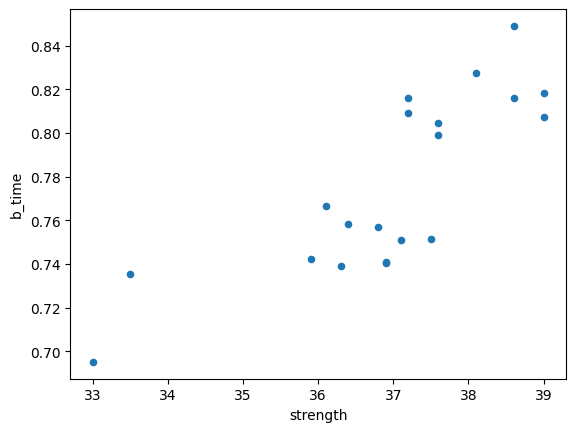

In [58]:
# 설명변수 초코칩 강도가 증가함에 따라 굽는 시간도 증가하는 형태를 파악할 수 있다.
df.plot.scatter(x = 'strength', y = 'b_time')

In [59]:
# 상관관계: 상관계수 0.804로 두 변수 간 매우 높은 선형관계가 있다.
# 강도가 증가하면 시간도 증가하는 관계이다.
df.corr(method = 'pearson').round(3)

,strength,b_time
strength,1.000,0.804
b_time,0.804,1.000


In [60]:
# 회귀분석: y ~ x1 (+ x2 + ...) 이용 - 상수항 자동추가
reg_model = smf.ols(formula = 'b_time ~ strength', data = df)
reg_res = reg_model.fit()

reg_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 b_time   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.95e-05
Time:                        22:56:27   Log-Likelihood:                 46.530
No. Observations:                  20   AIC:                            -89.06
Df Residuals:                      18   BIC:                            -87.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0023      0.135      0.017      0.987      -0.281       0.286
strength       0.0209      0.004      5.736      0.000       0.013       0.029
==============================================================================
Omnibus:                        2.651   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.266   Jarque-Bera (JB):                1.168
Skew:                           0.047   Prob(JB):                        0.558
Kurtosis:                       1.820   Cond. No.                         898.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 해석
- 관측값 = 20개, 잔차의 자유도 = 18, 모델의 자유도 = 1
- R-squared = 0.646 -> 설명변수 초코칩의 강도가 굽는 시간을 64.6% 설명가능하다.
- F-통계량 = 32.9이고 p-value = 1.95e-05로 모델이 적합하다고 볼 수 있다.
- 초코칩 강도 x의 coef = 0.0209 -> p-value = 0 으로 변수가 통계적으로 유의미하다. <br>
 = 유의수준 5%하에서 p-value=0으로 독립변수, 초코칩의 강도가 설명력이 없다는 귀무가설을 기각한다. 따라서, 초코칩의 강도는 설명력이 있다고 볼 수 있다.
- Prob(Omnibus): p-value = 0.266으로 유의수준 5%하에서 모집단은 정규성을 따른다는 귀무가설을 채택한다.
- 최종 회귀식은 $\hat{time}$  = 0.0023 + 0.0209*Strength 이고 초코칩의 강도가 1단위 증가할 때마다 굽는 시간은 0.0209분(혹은 시간) 증가

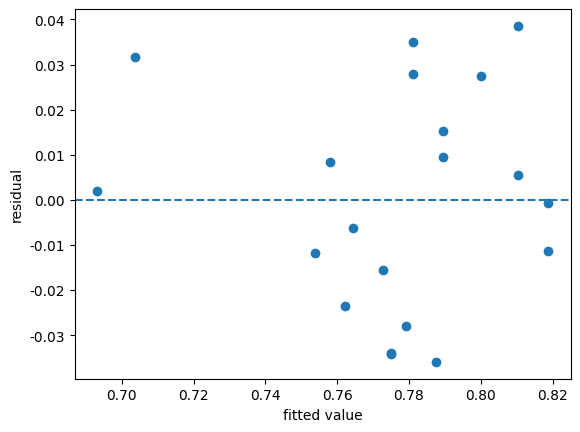

In [61]:
## 오차의 가정 검통
# 1. 등분산성: y = 0을 기준으로 랜덤하게 분포하여 등분산성 만족
plt.scatter(reg_res.fittedvalues, reg_res.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle='--')

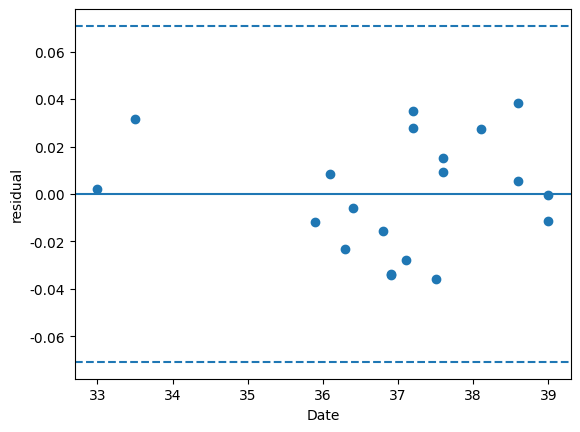

In [62]:
# 2. 독립성: y = 0을 기준으로 랜덤하게 산포되어 있어 독립성 만족
plt.scatter(df['strength'], reg_res.resid, marker = 'o')
plt.xlabel("Date"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle='-')
plt.axhline(y = 3*np.std(reg_res.resid), linestyle='--')
plt.axhline(y = -3*np.std(reg_res.resid), linestyle='--')

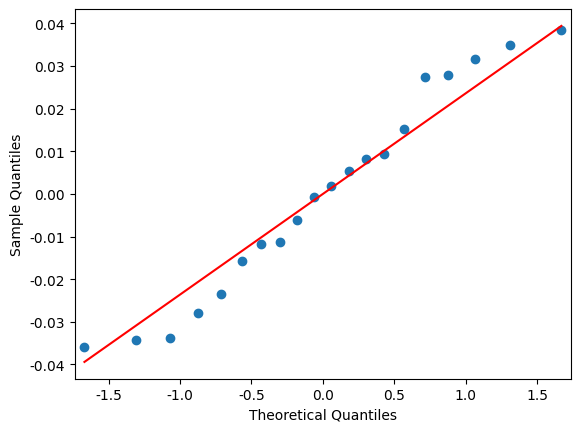

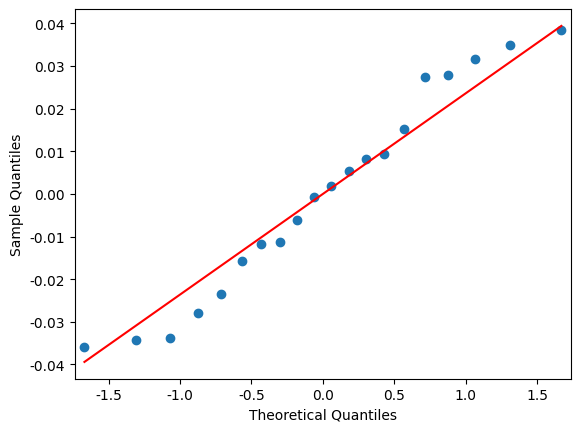

In [63]:
# 3. 잔차 정규성
qqplot(reg_res.resid, line='s') # q = quartile

In [64]:
from statsmodels.stats.stattools import omni_normtest

# 옴니버스 적용: 정규분포 직선을 중심으로 분포하고 검정통계량이 귀무가설을 채택하므로 정규분포를 따른다.
omni_normtest(reg_res.resid, axis=0)

NormaltestResult(statistic=2.651191714735189, pvalue=0.26564462561419333)

#### 해석
1. 등분산성/독립성 검정 결과, 각각 y = 0을 기준으로 랜덤하게 분포하여 가정을 만족한다.
2. 정규성검정 결과, 정규분포 직선을 중심으로 데이터가 분포하고 검정 통계량이 귀무가설을 채택하여 정규분포를 따른다고 할 수 있다.